In [252]:
from sklearn import datasets

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from sklearn import metrics

from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans

import seaborn as sns

In [253]:
# df = pd.read_csv("HackerRank-Numeric.csv")
df_value = pd.read_csv("HackRankDataset.csv")

In [254]:
print(df_value.head())

   RespondentID       StartDate         EndDate CountryNumeric2  \
0    6464453728  10/19/17 11:51  10/20/17 12:05     South Korea   
1    6478031510   10/26/17 6:18   10/26/17 7:49         Ukraine   
2    6464392829  10/19/17 10:44  10/19/17 10:56        Malaysia   
3    6481629912   10/27/17 1:51   10/27/17 2:05         Curaçao   
4    6488385057  10/31/17 11:46  10/31/17 11:59             NaN   

    q1AgeBeginCoding              q2Age q3Gender  \
0  16 - 20 years old  18 - 24 years old   Female   
1  16 - 20 years old  25 - 34 years old     Male   
2  11 - 15 years old  12 - 18 years old   Female   
3  11 - 15 years old  12 - 18 years old     Male   
4  16 - 20 years old  25 - 34 years old   Female   

                           q4Education q0004_other  \
0                         Some college         NaN   
1  Post graduate degree (Masters, PhD)         NaN   
2                         Some college         NaN   
3                     College graduate         NaN   
4             

In [255]:
df_country_age_lang = df_value[['CountryNumeric2','q3Gender', 'q25LangC', 'q25LangCPlusPlus', 'q25LangJava', 'q25LangPython', 'q25LangRuby', 'q25LangJavascript', 'q25LangCSharp', 'q25LangGo', 'q25LangSwift', 'q25LangR']]

In [256]:
df_country_age_lang.columns = ['Country', 'Gender', 'C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'CSharp', 'Go', 'Swift', 'R']

In [257]:
df_country_age_lang

,Country,Gender,C,C++,Java,Python,Ruby,Javascript,CSharp,Go,Swift,R
0,South Korea,Female,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know
1,Ukraine,Male,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Malaysia,Female,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn
3,Curaçao,Male,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
4,NaN,Female,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN
5,United States,Male,Will Learn,Will Learn,Know,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Know
6,United States,Male,Know,Know,Will Learn,Will Learn,NaN,Know,Will Learn,NaN,NaN,Will Learn
7,United States,Male,NaN,Know,NaN,Know,NaN,Will Learn,NaN,NaN,NaN,NaN
8,Switzerland,Male,Know,Will Learn,Will Learn,NaN,NaN,NaN,Know,NaN,NaN,NaN
9,Israel,Male,Know,Will Learn,Will Learn,Know,Will Learn,Know,Know,Will Learn,Will Learn,Will Learn


In [258]:
is_female = df_country_age_lang['Gender'] == 'Female'

In [259]:
df_female = df_country_age_lang[is_female]

In [260]:
df_female

,Country,Gender,C,C++,Java,Python,Ruby,Javascript,CSharp,Go,Swift,R
0,South Korea,Female,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know
2,Malaysia,Female,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn
4,NaN,Female,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN
13,NaN,Female,NaN,Will Learn,Know,Know,Know,Know,Will Learn,Will Learn,NaN,NaN
14,Poland,Female,NaN,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,NaN,NaN,NaN
15,NaN,Female,Know,Know,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN
16,United Kingdom,Female,NaN,Will Learn,Will Learn,Will Learn,NaN,Will Learn,NaN,NaN,NaN,NaN
19,Israel,Female,NaN,Know,Know,Will Learn,NaN,NaN,Know,NaN,NaN,NaN
22,Indonesia,Female,Know,Will Learn,Will Learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Ukraine,Female,NaN,NaN,NaN,Will Learn,NaN,NaN,NaN,NaN,NaN,NaN


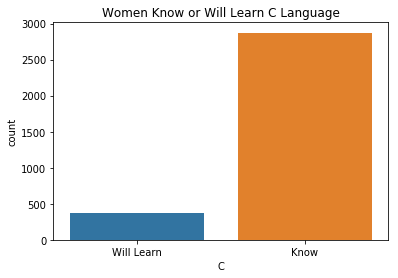

In [261]:
sns.countplot(data=df_female, x="C")
plt.title("Women Know or Will Learn C Language")
plt.show()

In [262]:
df_lang = df_country_age_lang[['C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'CSharp', 'Go', 'Swift', 'R']]

In [263]:
df_lang

,C,C++,Java,Python,Ruby,Javascript,CSharp,Go,Swift,R
0,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know
1,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn
3,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN
5,Will Learn,Will Learn,Know,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Know
6,Know,Know,Will Learn,Will Learn,NaN,Know,Will Learn,NaN,NaN,Will Learn
7,NaN,Know,NaN,Know,NaN,Will Learn,NaN,NaN,NaN,NaN
8,Know,Will Learn,Will Learn,NaN,NaN,NaN,Know,NaN,NaN,NaN
9,Know,Will Learn,Will Learn,Know,Will Learn,Know,Know,Will Learn,Will Learn,Will Learn


In [264]:
df_langmelt = pd.melt(df_lang)

In [265]:
df_langmelt
df_langmelt.dropna(subset=['value'], inplace=True)
print(df_langmelt)
isKnown = df_langmelt['value'] == 'Know'
known = df_langmelt[isKnown]
willLearn = df_langmelt['value'] == 'Will Learn'
learn = df_langmelt[willLearn]

       variable       value
0             C  Will Learn
2             C  Will Learn
5             C  Will Learn
6             C        Know
8             C        Know
9             C        Know
10            C        Know
12            C        Know
15            C        Know
17            C  Will Learn
20            C        Know
22            C        Know
23            C  Will Learn
28            C  Will Learn
29            C        Know
30            C        Know
31            C        Know
32            C        Know
33            C        Know
36            C        Know
37            C        Know
38            C        Know
39            C        Know
40            C        Know
42            C        Know
46            C        Know
49            C  Will Learn
50            C        Know
51            C        Know
52            C        Know
...         ...         ...
250833        R  Will Learn
250834        R  Will Learn
250836        R  Will Learn
250837        R  Wil

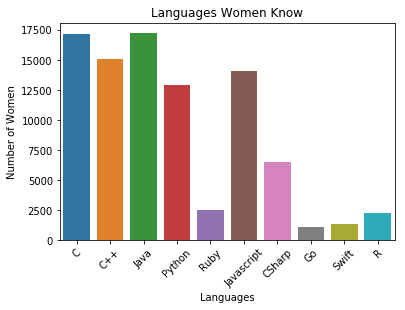

In [266]:
chart1 = sns.countplot(data=known, x="variable")
plt.title("Languages Women Know")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
plt.show()

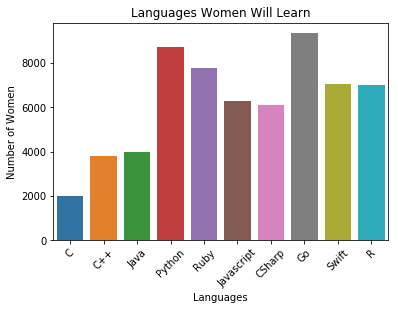

In [267]:
chart2 = sns.countplot(data=learn, x="variable")
plt.title("Languages Women Will Learn")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
plt.show()

In [184]:
#number of pairs of bars
N = 10

In [185]:
#specify values of 1st bar
isKnown = df_langmelt['value'] == 'Know'
known_bar = df_langmelt[isKnown]

In [186]:
#specify values of 2nd bar
willLearn = df_langmelt['value'] == 'Will Learn'
willLearn_bar = df_langmelt[willLearn]

In [171]:
willLearn_bar



,variable,value
0,C,Will Learn
2,C,Will Learn
5,C,Will Learn
17,C,Will Learn
23,C,Will Learn
28,C,Will Learn
49,C,Will Learn
61,C,Will Learn
85,C,Will Learn
90,C,Will Learn


In [172]:
# width of bar
width = 0.3

In [173]:
# Position on bars on x-axis
ind = np.arange(N)

TypeError: unhashable type: 'numpy.ndarray'

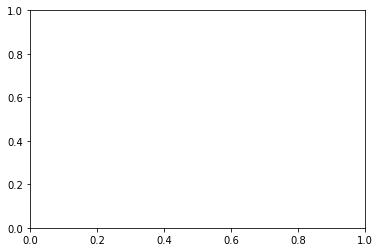

In [174]:
# Plotting
plt.bar(ind, known_bar, width, label='Know')
plt.bar(ind + width, willLearn_bar, width, label='Will Learn')

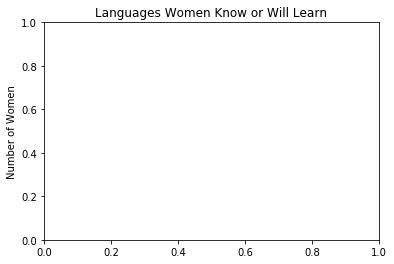

In [175]:
plt.ylabel('Number of Women')
plt.title('Languages Women Know or Will Learn')
plt.show()